In [34]:
#Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from scipy.stats import iqr
import scipy.stats as stats
from scipy.stats import shapiro, ttest_1samp,ttest_ind
import statsmodels.api as sm

# Problem 1:

In [2]:
#Loading the dataset
wc=pd.read_excel('Wholesale customers data.xlsx',sheet_name='Wholesale customers data')

In [3]:
#Fetching the first 5 rows
wc.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
#Copying the data
wc1=wc.copy()

In [5]:
#calculating the total amount spent
wc1['Total Amt Spent']=wc1['Fresh']+wc1['Milk']+wc1['Grocery']+wc1['Frozen']+wc1['Detergents_Paper']+wc1['Delicatessen']
wc1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Amt Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [6]:
#Pivot table for Channel vs Total amount spent
pv_1 =wc1.pivot_table(index=['Channel'],values=['Total Amt Spent'],margins=False,aggfunc=np.sum)
print (pv_1)

         Total Amt Spent
Channel                 
Hotel            7999569
Retail           6619931


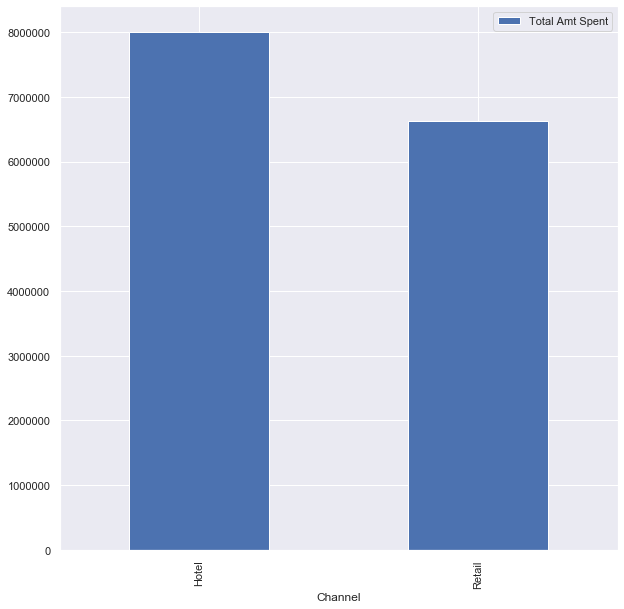

In [7]:
ax=pv_1.plot(kind='bar', figsize=(10,10))

In [8]:
#Pivot table for Region vs Total amount spent
pv_2 =wc1.pivot_table(index=['Region'],values=['Total Amt Spent'],margins=False,aggfunc=np.sum)
print (pv_2)

        Total Amt Spent
Region                 
Lisbon          2386813
Oporto          1555088
Other          10677599


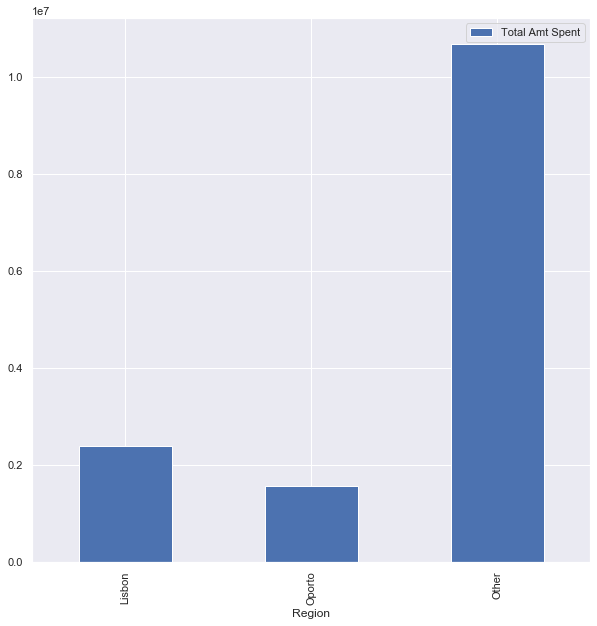

In [9]:
ax=pv_2.plot(kind='bar', figsize=(10,10))

In [10]:
#Pivot table for Region, Channel vs Total amount spent
pv_3 =wc1.pivot_table(index=['Region','Channel'],values=['Total Amt Spent'],margins=False,aggfunc=np.sum)
print (pv_3)

                Total Amt Spent
Region Channel                 
Lisbon Hotel            1538342
       Retail            848471
Oporto Hotel             719150
       Retail            835938
Other  Hotel            5742077
       Retail           4935522


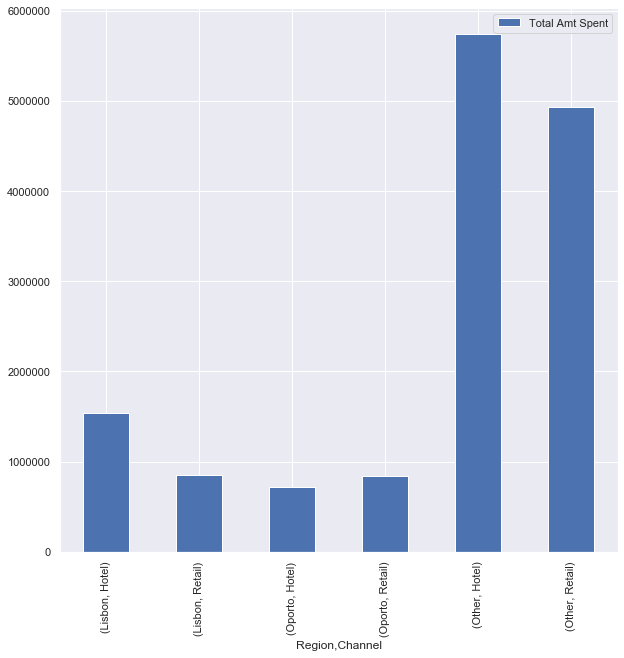

In [11]:
ax=pv_3.plot(kind='bar', figsize=(10,10))

In [12]:
#Pivot table for Channel vs Total amount spent for each variety
pv_4 =wc.pivot_table(index=['Channel'], 
                      values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],
                      margins=False,aggfunc=np.sum)

print (pv_4)

         Delicatessen  Detergents_Paper    Fresh   Frozen  Grocery     Milk
Channel                                                                    
Hotel          421955            235587  4015717  1116979  1180717  1028614
Retail         248988           1032270  1264414   234671  2317845  1521743


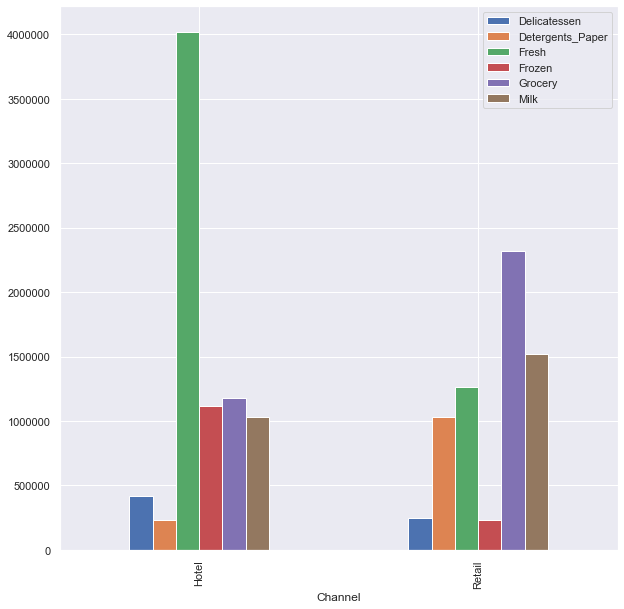

In [13]:
ax=pv_4.plot(kind='bar',figsize=(10,10))

In [14]:
#Pivot table for Region vs Total amount spent for each variety
pv_5 =wc.pivot_table(index=['Region'], 
                      values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],
                      margins=False,aggfunc=np.sum)
print (pv_5)

        Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery     Milk
Region                                                                   
Lisbon        104327            204136   854833  231026   570037   422454
Oporto         54506            173311   464721  190132   433274   239144
Other         512110            890410  3960577  930492  2495251  1888759


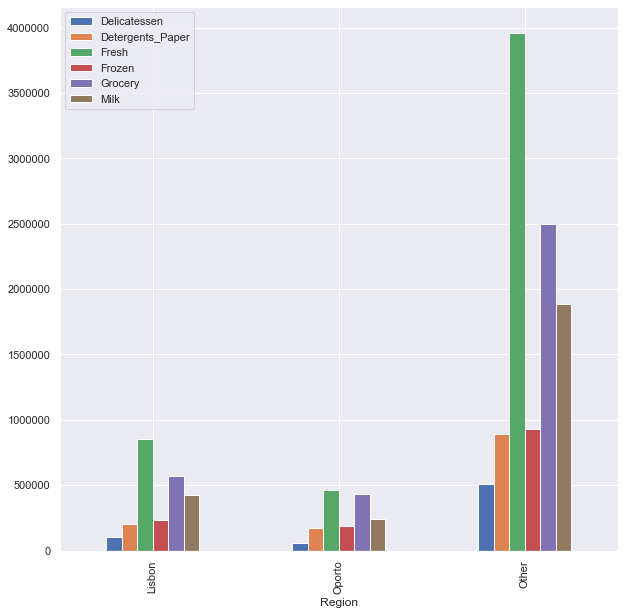

In [15]:
ax=pv_5.plot(kind='bar',figsize=(10,10))

In [17]:
#Pivot table for Channel,Region vs Total amount spent for each variety
pv_6 =wc.pivot_table(index=['Region','Channel'], 
                      values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],
                   margins=True,margins_name='Total',aggfunc=np.sum)

print (pv_6)

                Delicatessen  Detergents_Paper    Fresh   Frozen  Grocery  \
Region Channel                                                              
Lisbon Hotel           70632             56081   761233   184512   237542   
       Retail          33695            148055    93600    46514   332495   
Oporto Hotel           30965             13516   326215   160861   123074   
       Retail          23541            159795   138506    29271   310200   
Other  Hotel          320358            165990  2928269   771606   820101   
       Retail         191752            724420  1032308   158886  1675150   
Total                 670943           1267857  5280131  1351650  3498562   

                   Milk  
Region Channel           
Lisbon Hotel     228342  
       Retail    194112  
Oporto Hotel      64519  
       Retail    174625  
Other  Hotel     735753  
       Retail   1153006  
Total           2550357  


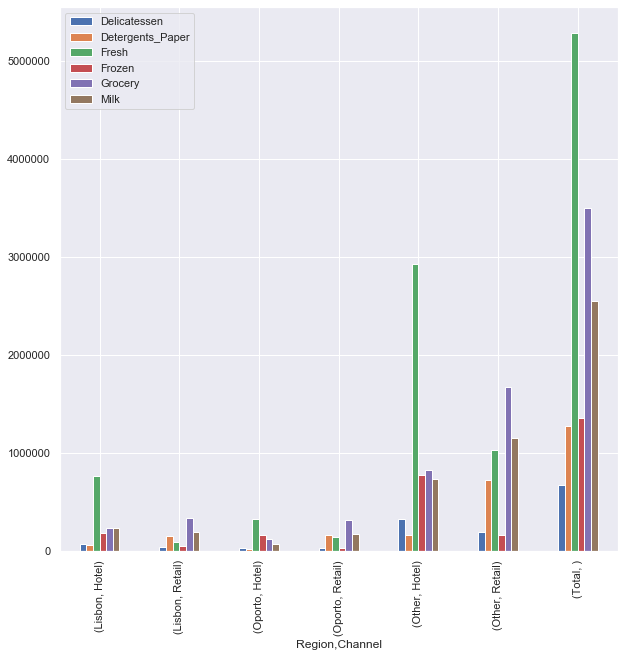

In [18]:
ax=pv_6.plot(kind='bar',figsize=(10,10))

In [19]:
#Copying the dataset
wc2=wc.copy()
wc2.drop(['Buyer/Spender'], axis = 1,inplace=True)
wc2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [20]:
#Summary of the given dataset
wc2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [22]:
#IQR for all variables
wc2.quantile(q=.75,axis=0) - wc2.quantile(q=.25, axis=0)

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64

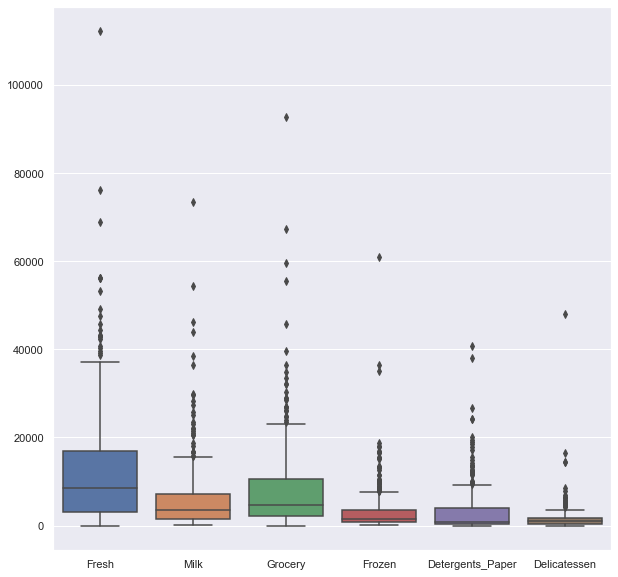

In [23]:
#Box plot to find outliers
ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=wc2)

In [24]:
#Find consistency behaviour using standard deviation
wc2.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [25]:
#Find consistency behaviour using variance
wc2.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

# Problem 2:

In [26]:
#Loading the dataset
sv=pd.read_csv('Survey.csv')

In [27]:
sv.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [28]:
#Contingency table Gender vs Major
ct_1 = pd.crosstab(sv['Gender'],sv['Major'],margins = True, margins_name='Total') 
print(ct_1) 

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
Total            7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  Total  
Gender                                                            
Female           4      3                    9          0     33  
Male             6      4                    5          3     29  
Total           10      7                   14          3     62  


In [29]:
ct_2 = pd.crosstab(sv['Gender'],sv['Grad Intention'],margins = True, margins_name='Total') 
print(ct_2) 

Grad Intention  No  Undecided  Yes  Total
Gender                                   
Female           9         13   11     33
Male             3          9   17     29
Total           12         22   28     62


In [30]:
ct_3 = pd.crosstab(sv['Gender'],sv['Employment'],margins = True, margins_name='Total') 
print(ct_3) 

Employment  Full-Time  Part-Time  Unemployed  Total
Gender                                             
Female              3         24           6     33
Male                7         19           3     29
Total              10         43           9     62


In [31]:
ct_4 = pd.crosstab(sv['Gender'],sv['Computer'],margins = True, margins_name='Total') 
print(ct_4)

Computer  Desktop  Laptop  Tablet  Total
Gender                                  
Female          2      29       2     33
Male            3      26       0     29
Total           5      55       2     62


Text(0.5, 1.0, 'Salary vs Frequency')

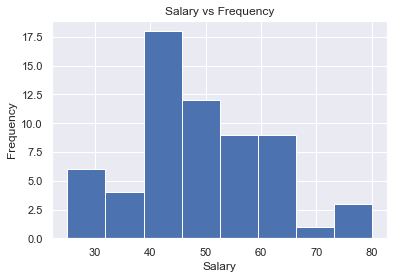

In [32]:
#Salary - Histogram
plt.hist(sv['Salary'],bins='auto')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary vs Frequency')

In [35]:
#H0: Salary data is Normally distributed
#H1: Salary data is not Normally distributed
shapiro(sv['Salary'])

(0.9565856456756592, 0.028000956401228905)

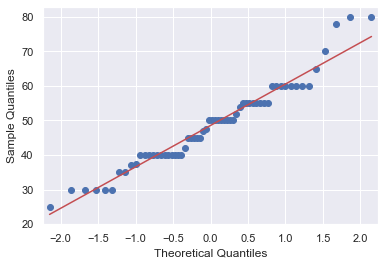

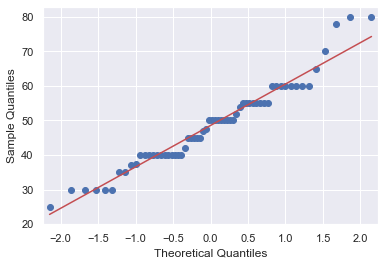

In [36]:
#QQ plot for Salary
sm.qqplot(sv['Salary'], line='s')

Text(0.5, 1.0, 'Spending vs Frequency')

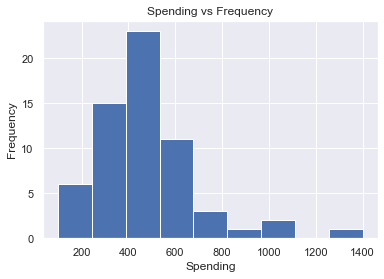

In [37]:
#Spending - Histogram
plt.hist(sv['Spending'],bins='auto')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.title('Spending vs Frequency')

In [38]:
#H0: Spending data is Normally distributed
#H1: Spending data is not Normally distributed
shapiro(sv['Spending'])

(0.8777452111244202, 1.6854661225806922e-05)

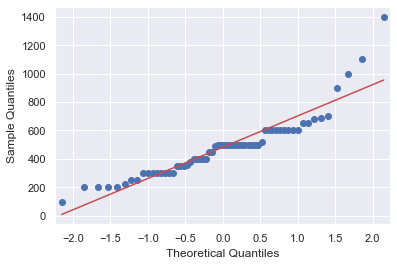

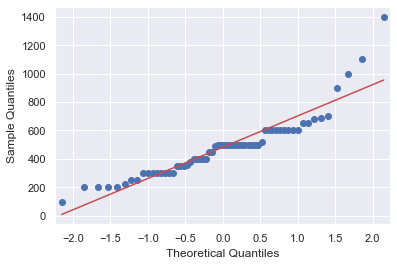

In [39]:
#QQ plot for Spending
sm.qqplot(sv['Spending'], line='s')

Text(0.5, 1.0, 'Text Messages vs Frequency')

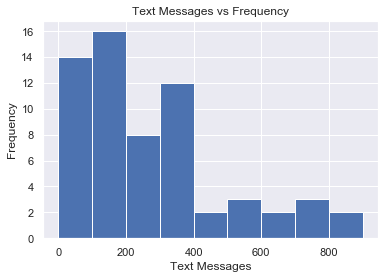

In [40]:
#Text Messages - Histogram
plt.hist(sv['Text Messages'],bins='auto')
plt.xlabel('Text Messages')
plt.ylabel('Frequency')
plt.title('Text Messages vs Frequency')

In [41]:
#H0: Text Messages data is Normally distributed
#H1: Text Messages data is not Normally distributed
shapiro(sv['Text Messages'])

(0.8594191074371338, 4.324040673964191e-06)

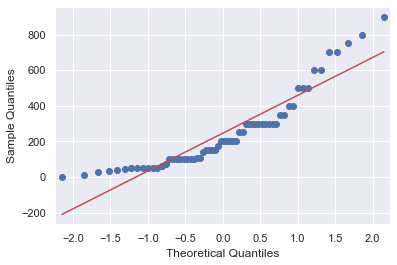

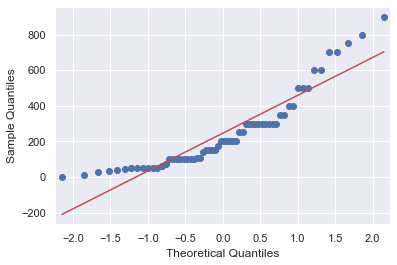

In [42]:
#QQ plot for Text Messages
sm.qqplot(sv['Text Messages'], line='s')

# Problem 3:

In [46]:
#Loading the dataset
ab=pd.read_csv('A+&+B+shingles.csv')
ab.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [47]:
#Creating data subset
ab_1=ab.copy()
ab_1.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [48]:
#Dropping the column "A" and null values in column "B"
ab_1.drop(['A'],axis=1, inplace=True)
ab_1.dropna(inplace=True)
ab_1.head(5)

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37


In [49]:
#Performing one sample t-test for sample A
t_statistic, p_value = ttest_1samp(ab['A'], 0.35)
print(t_statistic,p_value)

-1.4735046253382782 0.14955266289815025


In [50]:
#Performing one sample t-test for sample B
t_statistic, p_value = ttest_1samp(ab_1['B'], 0.35)
print(t_statistic,p_value)

-3.1003313069986995 0.004180954800638363


In [51]:
#Performing normal distribution check using shapiro-wilk test for sample A
shapiro(ab['A'])

(0.9375598430633545, 0.042670514434576035)

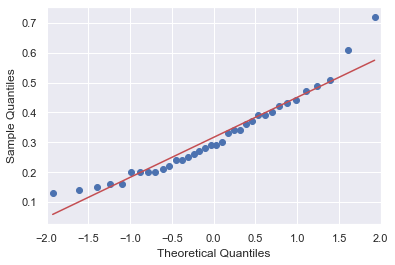

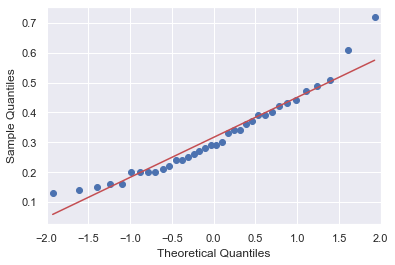

In [52]:
#Performing normal distribution check using Quantile- Quantile plot for sample A
sm.qqplot(ab['A'], line='s')

In [53]:
#Performing normal distribution check using shapiro-wilk test for sample A
shapiro(ab_1['B'])

(0.9172994494438171, 0.02002784051001072)

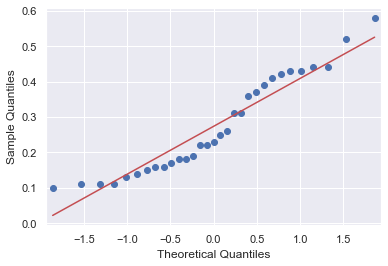

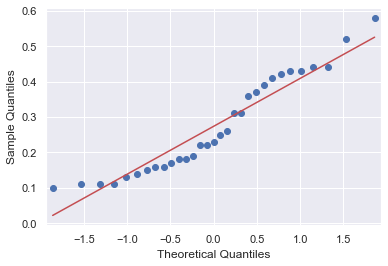

In [54]:
#Performing normal distribution check using Quantile- Quantile plot for sample B
sm.qqplot(ab_1['B'], line='s')

In [55]:
#Obtaining Standard deviation for A shingles
ab['A'].std()

0.13573082605973166

In [56]:
#Obtaining Standard deviation for B shingles
ab_1['B'].std()

0.13729647694185443

In [57]:
#Obtaining variance for A shingles
ab['A'].var()

0.018422857142857133

In [58]:
#Obtaining variance for B shingles
ab_1['B'].var()

0.018850322580645163